# Homework 1: Scrapping the web, Nobel Price Laureates

## Introduction

We are going to scrape the web to extract information about the different Nobel price laureates. This homework is designed to get you familiarized with some of the python data structures.

## Getting the data

We are going to get the data of all the [Nobel price laureates in Physics from Wikipedia](https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Physics). I wrote a small web parser to parse the table in a pandas dataframe. It is not important that you fully understand how it works but it does not hurt to try! I am using the [`httplib2`](https://github.com/httplib2/httplib2) and [`bs4`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) libraries. Be sure to download them:

>In a terminal window type
```
source activate YOUR_ENVIRONMENT
pip install httplib2
pip install bs4
source deactivate
```

In [25]:
# This line to ensure the use of plots within Jupyter
%matplotlib inline
# We import the necessary libraries
import pandas as pd
import numpy as np
from httplib2 import Http
from bs4 import BeautifulSoup, SoupStrainer
pd.options.display.max_rows = 250
class Parser:
    
    def __init__(self, url):  
        http = Http()
        status, response = http.request(url)
        tables = BeautifulSoup(response, "lxml", 
                              parse_only=SoupStrainer("table", {"class":"wikitable sortable"}))
        self.table = tables.contents[1]
    
    def parse_table(self):      
        rows = self.table.find_all("tr")
        header = self.parse_header(rows[0])
        table_array = [self.parse_row(row) for row in rows[1:]]
        table_df = pd.DataFrame(table_array, columns=header).apply(self.clean_table, 1)
        return table_df.replace({"Year":{'':np.nan}})
        
    def parse_row(self, row):     
        columns = row.find_all("td")
        return [BeautifulSoup.get_text(col).strip() for col in columns if BeautifulSoup.get_text(col) != '']
    
    def parse_header(self, row):     
        columns = row.find_all("th")
        return [BeautifulSoup.get_text(col).strip() for col in columns if BeautifulSoup.get_text(col) != ""]
    
    def clean_table(self, row):
        if not row.iloc[0].isdigit() and row.iloc[0] != '':
            return row.shift(1)
        else:
            return row
        
url = "https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Physics"        
parser = Parser(url)   
nobel_df = parser.parse_table()
nobel_df

,Year,Laureate[A],Country[B],Rationale[C]
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ..."
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t..."
2,NaN,Pieter Zeeman,Netherlands,None
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit..."
4,NaN,Pierre Curie,France,"""for their joint researches on the radiation p..."
5,NaN,Maria Skłodowska-Curie,Poland\n France,None
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th..."
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]"
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig..."
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the..."


## Data cleaning

As you can see the data is a bit messy so we need to clean a bit. We need to:

>- clean the columns names by changing them to: "Year", "Laureate", "Country", "Rationale".
- remove the rows that where the Nobel price was not awarded (the ones with missing values). You can use the [`pd.dropna`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) function with the argument `subset`.
- fill the missing values in the year and rational columns. You can use the [`pd.fillna`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) function with the argument `method='ffill'` (you can do that here because the rows are ordered by date).

In [26]:
# TODO: Clean the columns names
nobel_df.columns = ["Year", "Laureate", "Country", "Rationale"]

# TODO: drop all the rows where the nobel price was not awarded
nobel_df.dropna(subset=["Country"], inplace=True)

# TODO: fill the missing values in the year column"
nobel_df.fillna(method="ffill", inplace=True)

# Is your data clean?
nobel_df

,Year,Laureate,Country,Rationale
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ..."
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t..."
2,1902,Pieter Zeeman,Netherlands,"""in recognition of the extraordinary service t..."
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit..."
4,1903,Pierre Curie,France,"""for their joint researches on the radiation p..."
5,1903,Maria Skłodowska-Curie,Poland\n France,"""for their joint researches on the radiation p..."
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th..."
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]"
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig..."
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the..."


In [27]:
# Lets check that our data set does not contain missing values anymore
nobel_df.isnull().any()

Year         False
Laureate     False
Country      False
Rationale    False
dtype: bool

## Some questions about this data

Let's answer few questions about this data (with codes). 

>- How many physicists got a Nobel price? Be careful about possible duplicates. You can look at the [`pd.nunique()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html) function.
- How many countries are in this data set? Be careful about possible duplicates.

In [28]:
# TODO: How many physicists got a nobel price?
print(nobel_df["Laureate"].nunique())

# TODO: How many countries are in this data set?
print(pd.Series(sum(nobel_df["Country"].str.split("\n").tolist(), [])).str.strip().nunique())

203
26


Maybe you have noticed that some values for the Column "Country" are represented by 2 countries separated by a return character (i.e. "Austria-Hungary\n Germany"). Let's try to observe the distribution of countries in this data set.

>- Use the [`pandas.Series.str.split`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html) function to split the column "Country" into a column "Country_list" of lists of countries

In [29]:
# TODO: split the column "Country" into a column "Country_list" of lists of countries
nobel_df["Country_list"] = nobel_df["Country"].str.split("\n")

# We create a pandas series from this new column to ease the analysis on the countries. The sum on list is used to 
# flatten the list of lists into one list of countries.
countries = pd.Series(sum(nobel_df["Country_list"].tolist(), [])).str.strip()
countries

0              Germany
1          Netherlands
2          Netherlands
3               France
4               France
5               Poland
6               France
7       United Kingdom
8      Austria-Hungary
9              Germany
10      United Kingdom
11       United States
12              Poland
13              France
14               Italy
15             Germany
16         Netherlands
17             Germany
18              Sweden
19         Netherlands
20             Germany
21      United Kingdom
22           Australia
23      United Kingdom
24      United Kingdom
25             Germany
26             Germany
27         Switzerland
28             Germany
29         Switzerland
30             Denmark
31       United States
32              Sweden
33             Germany
34             Germany
35              France
36       United States
37      United Kingdom
38      United Kingdom
39              France
40               India
41             Germany
42             Austria
43      Uni

Let's look at the distribution of countries:
- Print the countries with the number of time it is contained in the `countries` pandas Series. You can use the [`pd.Series.value_counts`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) function.
- Plot a barplot ordered by those number. You can use the function [`pd.plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) by changing the argument `kind`.

In [30]:
# TODO: print the countries and the number of times they are contained in the countries pandas Series. It should
# be printed ordered by the number of times they are contained in the countries pandas Series

countries.value_counts()

United States      94
United Kingdom     27
Germany            18
France             13
Japan              11
Netherlands        10
West Germany        9
Soviet Union        7
Italy               5
Russia              5
Switzerland         5
Canada              4
Poland              4
Sweden              4
Denmark             3
Austria             3
China               3
Hungary             2
India               2
Australia           2
Austria-Hungary     1
Norway              1
Ireland             1
Hong Kong           1
Belgium             1
Pakistan            1
dtype: int64

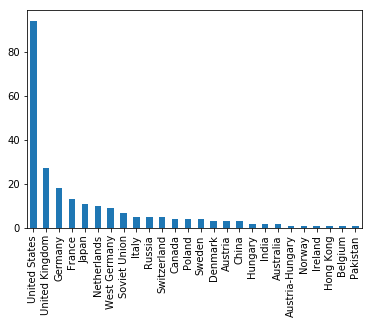

In [31]:
# TODO: Plot a barplot ordered by those number.
countries.value_counts().plot.bar();

## What type of physics those physicists are practicing?

Let's try to gather some data to understand what type of physics is associated to each of those physicists. Ultimately we want to extract the words that are characteristics of each physicist.

We extract the webpage links to have access to their bibliography.

In [32]:
from httplib2 import Http
from bs4 import BeautifulSoup, SoupStrainer

http = Http()
status, response = http.request(url)

table = BeautifulSoup(response, "lxml", parse_only=SoupStrainer('table'))
link_df = pd.DataFrame([[x.string, x["href"]] for x in table.contents[1].find_all("a")],
                       columns=["Text", "link"]).drop_duplicates()

link_df

,Text,link
0,[A],#endnote_1
1,[B],#endnote_2
2,[C],#endnote_3
3,None,/wiki/File:WilhelmR%C3%B6ntgen.JPG
4,Wilhelm Conrad Röntgen,/wiki/Wilhelm_R%C3%B6ntgen
5,Germany,/wiki/German_Empire
6,rays,/wiki/R%C3%B6ntgen_ray
7,[7],#cite_note-7
8,None,/wiki/File:H_A_Lorentz_(Nobel).jpg
9,Hendrik Lorentz,/wiki/Hendrik_Lorentz


We need now to merge this table to the `nobel_df` table. Use the [`pandas.DataFrame.merge`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) or  [`pandas.concat`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html) function to do so

In [33]:
# TODO: merge nobel_df and link_df into nobel_merged_df

nobel_merged_df = nobel_df.merge(link_df, left_on="Laureate", right_on="Text", how="left")
nobel_merged_df


,Year,Laureate,Country,Rationale,Country_list,Text,link
0,1901,Wilhelm Conrad Röntgen,Germany,"""in recognition of the extraordinary services ...",[Germany],Wilhelm Conrad Röntgen,/wiki/Wilhelm_R%C3%B6ntgen
1,1902,Hendrik Lorentz,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],Hendrik Lorentz,/wiki/Hendrik_Lorentz
2,1902,Pieter Zeeman,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],Pieter Zeeman,/wiki/Pieter_Zeeman
3,1903,Antoine Henri Becquerel,France,"""for his discovery of spontaneous radioactivit...",[France],Antoine Henri Becquerel,/wiki/Henri_Becquerel
4,1903,Pierre Curie,France,"""for their joint researches on the radiation p...",[France],Pierre Curie,/wiki/Pierre_Curie
5,1903,Maria Skłodowska-Curie,Poland\n France,"""for their joint researches on the radiation p...","[Poland, France]",Maria Skłodowska-Curie,/wiki/Maria_Sk%C5%82odowska-Curie
6,1904,Lord Rayleigh,United Kingdom,"""for his investigations of the densities of th...",[United Kingdom],Lord Rayleigh,"/wiki/John_Strutt,_3rd_Baron_Rayleigh"
7,1905,Philipp Eduard Anton von Lenard,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]","[Austria-Hungary, Germany]",Philipp Eduard Anton von Lenard,/wiki/Philipp_Lenard
8,1906,Joseph John Thomson,United Kingdom,"""for his theoretical and experimental investig...",[United Kingdom],Joseph John Thomson,/wiki/J._J._Thomson
9,1907,Albert Abraham Michelson,United States\n Poland,"""for his optical precision instruments and the...","[United States, Poland]",Albert Abraham Michelson,/wiki/Albert_Abraham_Michelson


>Did the merging completely work? Are there some missing values? If yes correct it

Now we are going to extract all the words in the Wikipedia page of each of those physicists. The following function `get_text` will extract the text of a Wikipedia page as a long string. 

>Use it to extract every text for each of the physicists into the columns "Bio". Use the function [`apply`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) to vectorize your code.

In [34]:
# Will Extract the text associated to every link
def get_text(link, root_website = "https://en.wikipedia.org"):    
    http = Http()
    status, response = http.request(root_website + link)

    body = BeautifulSoup(response, "lxml", parse_only=SoupStrainer("div", {"id":"mw-content-text"}))
    return BeautifulSoup.get_text(body.contents[1])

nobel_merged_df.set_index("Laureate", inplace=True)

# TODO: extract the text of the wikipedia page associated to each physicist
nobel_merged_df["Bio"] = nobel_merged_df.apply(lambda x: get_text(x["link"]), 1)
nobel_merged_df["Bio"]

Laureate
Wilhelm Conrad Röntgen                             \n\nWilhelm Röntgen\n\n\n\n\n\nBorn\nWilhelm C...
Hendrik Lorentz                                    Not to be confused with Hendrikus Albertus Lor...
Pieter Zeeman                                      \n\nPieter Zeeman\n\n\n\n\n\nBorn\n(1865-05-25...
Antoine Henri Becquerel                            For other uses, see Becquerel (disambiguation)...
Pierre Curie                                       \n\nPierre Curie\n\n\n\n\n\nBorn\n(1859-05-15)...
Maria Skłodowska-Curie                             This article is about the Polish physicist. Fo...
Lord Rayleigh                                      \n\nThe Lord Rayleigh\nOM PRS\n\n\n\n\n\nBorn\...
Philipp Eduard Anton von Lenard                    "Waterfall effect" redirects here. For the ill...
Joseph John Thomson                                This article is about the Nobel laureate and p...
Albert Abraham Michelson                           Not to be confused with the ath

We are going to remove all the punctuation along with the number and set all the words to lower case. We import the punctuation package.

In [35]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Here an example of how to remove punctuation and the numbers for one bio 

In [36]:
for p in punctuation + "1234567890":
    nobel_merged_df["Bio"][0] = nobel_merged_df["Bio"][0].replace(p,'').lower()  
    
nobel_merged_df["Bio"][0]

'\n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm conrad röntgen\n march \nlennep rhine province german confederation\n\n\ndied\n february  aged\xa0\nmunich bavaria germany\n\n\nnationality\ngerman\n\n\nalma\xa0mater\n\n\n\neth zurich\nuniversity of zurich\n\n\n\n\n\nknown\xa0for\ndiscovery of xrays\n\n\nawards\nmatteucci medal \nrumford medal \nelliott cresson medal \nbarnard medal \nnobel prize in physics \n\n\nscientific career\n\n\nfields\nphysics\nxray astronomy\n\n\ninstitutions\n\n\n\nuniversity of strassburg\nuniversity of hohenheim\nuniversity of giessen\nuniversity of würzburg\nuniversity of munich\n\n\n\n\n\ndoctoral advisor\naugust kundt\n\n\ndoctoral students\n\n\n\nherman march\nabram ioffe\nernst wagner\nrudolf ladenburg\n\n\n\n\n\nother\xa0notable students\nfranz s exner\n\n\n\n\n\nsignature\n\n\n\n\n\nwilhelm conrad röntgen ˈrɛntɡən dʒən ˈrʌnt german ˈvɪlhɛlm ˈʁœntɡən  march \xa0–  february  was a german mechanical engineer and physicist who on  november  produced and dete

>Write a function and then use the pandas `apply` to treat all the bios

In [37]:
# TODO: write a function that remove the punctuation and numbers and set every word to lower case
def clean_string(string):
    for p in punctuation + "1234567890":
        string = string.replace(p,'').lower()  
    return string

# TODO: apply this function to the "Bio" column
nobel_merged_df["Bio"] = nobel_merged_df["Bio"].apply(clean_string)   
nobel_merged_df["Bio"]

Laureate
Wilhelm Conrad Röntgen                             \n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...
Hendrik Lorentz                                    not to be confused with hendrikus albertus lor...
Pieter Zeeman                                      \n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...
Antoine Henri Becquerel                            for other uses see becquerel disambiguation\n\...
Pierre Curie                                       \n\npierre curie\n\n\n\n\n\nborn\n may \nparis...
Maria Skłodowska-Curie                             this article is about the polish physicist for...
Lord Rayleigh                                      \n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...
Philipp Eduard Anton von Lenard                    waterfall effect redirects here for the illuso...
Joseph John Thomson                                this article is about the nobel laureate and p...
Albert Abraham Michelson                           not to be confused with the ath

>Use the `str.split` function again to split each text on any whitespace character (i.e "\s") into the "Bio_split" column

In [38]:
# TODO: split the "Bio" column as a column of lists of the words 
nobel_merged_df["Bio_list"] = nobel_merged_df["Bio"].str.split("\s")
nobel_merged_df["Bio_list"]

Laureate
Wilhelm Conrad Röntgen                             [, , wilhelm, röntgen, , , , , , born, wilhelm...
Hendrik Lorentz                                    [not, to, be, confused, with, hendrikus, alber...
Pieter Zeeman                                      [, , pieter, zeeman, , , , , , born, , may, , ...
Antoine Henri Becquerel                            [for, other, uses, see, becquerel, disambiguat...
Pierre Curie                                       [, , pierre, curie, , , , , , born, , may, , p...
Maria Skłodowska-Curie                             [this, article, is, about, the, polish, physic...
Lord Rayleigh                                      [, , the, lord, rayleigh, om, prs, , , , , , b...
Philipp Eduard Anton von Lenard                    [waterfall, effect, redirects, here, for, the,...
Joseph John Thomson                                [this, article, is, about, the, nobel, laureat...
Albert Abraham Michelson                           [not, to, be, confused, with, t

As you can see there are a lot of empty elements in each of those lists. We can remove those using the [`filter`](http://book.pythontips.com/en/latest/map_filter.html) function or a comprehension list along with the `apply` function. 

>- Write a function that removes `None` elements from a list
- apply that function to the "Bio_list" columns

In [41]:
# TODO: Write a function that removes `None` elements from a list
def remove(list_to_clean, element_to_remove=[None, ""]):
    return [e for e in list_to_clean if e not in element_to_remove]

# TODO: apply that function to the "Bio_list" columns
nobel_merged_df["Bio_list"] = nobel_merged_df["Bio_list"].apply(remove)
nobel_merged_df["Bio_list"]

Laureate
Wilhelm Conrad Röntgen                             [, , wilhelm, röntgen, , , , , , born, wilhelm...
Hendrik Lorentz                                    [not, to, be, confused, with, hendrikus, alber...
Pieter Zeeman                                      [, , pieter, zeeman, , , , , , born, , may, , ...
Antoine Henri Becquerel                            [for, other, uses, see, becquerel, disambiguat...
Pierre Curie                                       [, , pierre, curie, , , , , , born, , may, , p...
Maria Skłodowska-Curie                             [this, article, is, about, the, polish, physic...
Lord Rayleigh                                      [, , the, lord, rayleigh, om, prs, , , , , , b...
Philipp Eduard Anton von Lenard                    [waterfall, effect, redirects, here, for, the,...
Joseph John Thomson                                [this, article, is, about, the, nobel, laureat...
Albert Abraham Michelson                           [not, to, be, confused, with, t

We are going to use the [`nltk`](http://www.nltk.org/) library to help us clean this data. Be sure to install the library with `pip` or `conda`.

Use the `nltk.download('stopwords')` function to download the stopwords corpus. A you can see, the stopwords are common english words that do not carry significant information of a specific text.

In [1]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/damien.benveniste/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 'should',
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 'the',
 'their',
 'theirs',
 'them',
 

We want to capture in each bag of words, the words that are characteristic of a specific physicist. There are many words in the english language that are not useful for that. We call those words the stopwords.

> Use your `remove` function to remove those words

In [278]:
from nltk.corpus import stopwords
words_to_remove = set(stopwords.words('english'))

# TODO: remove the stop words
nobel_merged_df["Bio_list"] = nobel_merged_df["Bio_list"].apply(lambda x: remove(x, words_to_remove))
nobel_merged_df["Bio_list"] 

Laureate
Wilhelm Conrad Röntgen                             [wilhelm, röntgen, born, wilhelm, conrad, rönt...
Hendrik Lorentz                                    [confused, hendrikus, albertus, lorentz, see, ...
Pieter Zeeman                                      [pieter, zeeman, born, may, zonnemaire, nether...
Antoine Henri Becquerel                            [uses, see, becquerel, disambiguation, antoine...
Pierre Curie                                       [pierre, curie, born, may, paris, france, died...
Maria Skłodowska-Curie                             [article, polish, physicist, uses, see, marie,...
Lord Rayleigh                                      [lord, rayleigh, om, prs, born, november, lang...
Philipp Eduard Anton von Lenard                    [waterfall, effect, redirects, illusory, visua...
Joseph John Thomson                                [article, nobel, laureate, physicist, moral, p...
Albert Abraham Michelson                           [confused, athlete, albert, mic

>Write a function that removes the words that have only one character

In [279]:
# TODO: write a function that removes the words that have only one character
def remove_one(list_to_clean):
    return [e for e in list_to_clean if len(e) > 1]

# TODO: apply this function to the "bio_list" column
nobel_merged_df["Bio_list"] = nobel_merged_df["Bio_list"].apply(remove_one)
nobel_merged_df["Bio_list"] 

Laureate
Wilhelm Conrad Röntgen                             [wilhelm, röntgen, born, wilhelm, conrad, rönt...
Hendrik Lorentz                                    [confused, hendrikus, albertus, lorentz, see, ...
Pieter Zeeman                                      [pieter, zeeman, born, may, zonnemaire, nether...
Antoine Henri Becquerel                            [uses, see, becquerel, disambiguation, antoine...
Pierre Curie                                       [pierre, curie, born, may, paris, france, died...
Maria Skłodowska-Curie                             [article, polish, physicist, uses, see, marie,...
Lord Rayleigh                                      [lord, rayleigh, om, prs, born, november, lang...
Philipp Eduard Anton von Lenard                    [waterfall, effect, redirects, illusory, visua...
Joseph John Thomson                                [article, nobel, laureate, physicist, moral, p...
Albert Abraham Michelson                           [confused, athlete, albert, mic

We are going to remove all the words that appear too few times. This is an attempt to filter the words that are not relevant to the particular physics at play

> Write a function that removes all the words under a certain amount of occurance

In [280]:
# TODO: write a function that remove all the words under a certain amount of occurance

def remove_n_occurrance(list_to_clean, n = 1):
    counts =pd.Series(list_to_clean).value_counts()
    word_to_remove = counts[counts <= n].index
    return [e for e in list_to_clean if e not in word_to_remove]  
    
nobel_merged_df["Bio_list"] = nobel_merged_df["Bio_list"].apply(remove_n_occurrance)
nobel_merged_df["Bio_list"] 

Laureate
Wilhelm Conrad Röntgen                             [wilhelm, röntgen, born, wilhelm, conrad, rönt...
Hendrik Lorentz                                    [lorentz, see, also, lorentz, hendrik, antoon,...
Pieter Zeeman                                      [pieter, zeeman, born, may, zonnemaire, nether...
Antoine Henri Becquerel                            [see, becquerel, antoine, henri, becquerel, he...
Pierre Curie                                       [pierre, curie, born, may, paris, died, april,...
Maria Skłodowska-Curie                             [polish, physicist, see, marie, curie, name, f...
Lord Rayleigh                                      [lord, rayleigh, om, november, essex, june, te...
Philipp Eduard Anton von Lenard                    [effect, effect, philipp, lenard, philipp, len...
Joseph John Thomson                                [nobel, physicist, see, thomson, sir, thomson,...
Albert Abraham Michelson                           [albert, albert, michelson, bor

Finally, we are just going to keep each word once and remove the duplicate. You can use the function `set` to do so

> Write a function that remove the duplicated words

In [281]:
# TODO: write a function that keeps only each element of a list only once
def remove_duplicates(list_to_clean):
    return list(set(list_to_clean))

nobel_merged_df["Bio_list"] = nobel_merged_df["Bio_list"].apply(remove_duplicates)
nobel_merged_df["Bio_list"] 

Laureate
Wilhelm Conrad Röntgen                             [würzburg, used, medal, curie, xray, article, ...
Hendrik Lorentz                                    [different, dutch, presented, doctoral, electr...
Pieter Zeeman                                      [dutch, nature, kamerlingh, onnes, university,...
Antoine Henri Becquerel                            [used, medal, lumière, phosphorescent, curie, ...
Pierre Curie                                       [used, april, doctoral, american, matteucci, m...
Maria Skłodowska-Curie                             [april, industrial, training, months, existenc...
Lord Rayleigh                                      [peter, balfour, used, medal, curie, impedance...
Philipp Eduard Anton von Lenard                    [lénárd, medal, germany, curie, contributions,...
Joseph John Thomson                                [measurement, beam, used, april, foundation, m...
Albert Abraham Michelson                           [measurement, pease, used, amer

We now are going to try to guess from this data, what type of physics those physicists are practicing. [Wikipedia](https://en.wikipedia.org/wiki/Physics) identifies 6 types of physics (to be debated!): [Nuclear physics](https://en.wikipedia.org/wiki/Nuclear_physics), [particle physics](https://en.wikipedia.org/wiki/Particle_physics), [Atomic, molecular, and optical physics](https://en.wikipedia.org/wiki/Atomic,_molecular,_and_optical_physics), [Condensed matter physics](https://en.wikipedia.org/wiki/Condensed_matter_physics), [Astrophysics](https://en.wikipedia.org/wiki/Astrophysics) and [Physical_cosmology](https://en.wikipedia.org/wiki/Physical_cosmology). We are going to get the text data from those pages and look at the set of words that are 2 different pages.

> Use your previously written functions to clean those the content from those Wikipedia pages

In [282]:
physics_df = pd.DataFrame({"Field": ["Nuclear physics",
                                     "Particle physics", 
                                     "Atomic, molecular, and optical physics", 
                                     "Condensed matter physics", 
                                     "Astrophysics",
                                     "Physical_cosmology"],
                           "link": ["/wiki/Nuclear_physics",
                                     "/wiki/Particle_physics", 
                                     "/wiki/Atomic,_molecular,_and_optical_physics", 
                                     "/wiki/Condensed_matter_physics", 
                                     "/wiki/Astrophysics",
                                     "/wiki/Physical_cosmology"]})

physics_df.set_index("Field", inplace=True)

# TODO: gather and clean the data related to those physics fields wikipedia pages
physics_df["Text_data"] = (physics_df.apply(lambda x: get_text(x["link"]), 1)
                                     .apply(clean_string)
                                     .str.split("\s")
                                     .apply(remove)
                                     .apply(lambda x: remove(x, words_to_remove))
                                     .apply(remove_one)
                                     .apply(remove_n_occurrance)
                                     .apply(remove_duplicates))

physics_df["Text_data"]

Field
Nuclear physics                           [proton, unstable, american, gravity, electrom...
Particle physics                          [proton, beam, used, pair, majorana, gravity, ...
Atomic, molecular, and optical physics    [inc, proton, electromagnetic, nonlinear, semi...
Condensed matter physics                  [different, used, april, american, scale, jose...
Astrophysics                              [different, galaxies, american, electromagneti...
Physical_cosmology                        [clusters, galaxies, telescope, stephen, gravi...
Name: Text_data, dtype: object

>For each physicist compute the number of words in his biography that intersect with the physics fields pages. You can use the function [`intersection`](https://docs.python.org/2/library/sets.html) of the `set` type

In [162]:
# Example
list1 = [1, 2, 3, 4]
list2 = [3, 4, 5, 6]
set(list1).intersection(list2)

{3, 4}

In [283]:
# TODO: Write a function that count the number of words that intersect between two lists
def intesect_count(list1, list2):
    return len(set(list1).intersection(list2))

# TODO: create those columns
nobel_merged_df["Count_intersect_Nuclear"] = nobel_merged_df["Bio_list"].apply(
    lambda x: intesect_count(x, physics_df.loc["Nuclear physics", "Text_data"])
)
nobel_merged_df["Count_intersect_Particle"] = nobel_merged_df["Bio_list"].apply(
    lambda x: intesect_count(x, physics_df.loc["Particle physics", "Text_data"])
)
nobel_merged_df["Count_intersect_Atomic"] = nobel_merged_df["Bio_list"].apply(
    lambda x: intesect_count(x, physics_df.loc["Atomic, molecular, and optical physics", "Text_data"])
)
nobel_merged_df["Count_intersect_Condensed"] = nobel_merged_df["Bio_list"].apply(
    lambda x: intesect_count(x, physics_df.loc["Condensed matter physics", "Text_data"])
)
nobel_merged_df["Count_intersect_Astrophysics"] = nobel_merged_df["Bio_list"].apply(
    lambda x: intesect_count(x, physics_df.loc["Astrophysics", "Text_data"])
)
nobel_merged_df["Count_intersect_Cosmology"] = nobel_merged_df["Bio_list"].apply(
    lambda x: intesect_count(x, physics_df.loc["Physical_cosmology", "Text_data"])
)

nobel_merged_df

,Year,Country,Rationale,Country_list,Text,link,Bio,Bio_list,Count_intersect_Nuclear,Count_intersect_Particle,...,Count_total_Atomic,Count_total_Condensed,Count_total_Astrophysics,Count_total_Cosmology,Proba_Nuclear,Proba_Particle,Proba_Atomic,Proba_Condensed,Proba_Astrophysics,Proba_Cosmology
Laureate,,,,,,,,,,,,,,,,,,,,,
Wilhelm Conrad Röntgen,1901,Germany,"""in recognition of the extraordinary services ...",[Germany],Wilhelm Conrad Röntgen,/wiki/Wilhelm_R%C3%B6ntgen,\n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...,"[würzburg, used, medal, curie, xray, article, ...",14,17,...,489,763,535,765,0.166866,0.163056,0.158304,0.166275,0.176847,0.168651
Hendrik Lorentz,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],Hendrik Lorentz,/wiki/Hendrik_Lorentz,not to be confused with hendrikus albertus lor...,"[different, dutch, presented, doctoral, electr...",42,53,...,672,923,726,927,0.147968,0.174727,0.162593,0.183203,0.150499,0.181010
Pieter Zeeman,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],Pieter Zeeman,/wiki/Pieter_Zeeman,\n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...,"[dutch, nature, kamerlingh, onnes, university,...",16,13,...,409,689,463,700,0.180542,0.176269,0.180852,0.166229,0.159759,0.136348
Antoine Henri Becquerel,1903,France,"""for his discovery of spontaneous radioactivit...",[France],Antoine Henri Becquerel,/wiki/Henri_Becquerel,for other uses see becquerel disambiguation\n\...,"[used, medal, lumière, phosphorescent, curie, ...",18,16,...,467,744,514,751,0.190159,0.163895,0.154204,0.165929,0.175129,0.150684
Pierre Curie,1903,France,"""for their joint researches on the radiation p...",[France],Pierre Curie,/wiki/Pierre_Curie,\n\npierre curie\n\n\n\n\n\nborn\n may \nparis...,"[used, april, doctoral, american, matteucci, m...",29,27,...,476,742,519,756,0.167790,0.155516,0.159129,0.181197,0.186080,0.150288
Maria Skłodowska-Curie,1903,Poland\n France,"""for their joint researches on the radiation p...","[Poland, France]",Maria Skłodowska-Curie,/wiki/Maria_Sk%C5%82odowska-Curie,this article is about the polish physicist for...,"[april, industrial, training, months, existenc...",61,63,...,1060,1285,1089,1290,0.168764,0.180016,0.115510,0.193291,0.152589,0.189830
Lord Rayleigh,1904,United Kingdom,"""for his investigations of the densities of th...",[United Kingdom],Lord Rayleigh,"/wiki/John_Strutt,_3rd_Baron_Rayleigh",\n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...,"[peter, balfour, used, medal, curie, impedance...",18,23,...,489,758,538,767,0.139978,0.145897,0.173861,0.190674,0.177780,0.171810
Philipp Eduard Anton von Lenard,1905,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]","[Austria-Hungary, Germany]",Philipp Eduard Anton von Lenard,/wiki/Philipp_Lenard,waterfall effect redirects here for the illuso...,"[lénárd, medal, germany, curie, contributions,...",18,22,...,464,730,510,738,0.170463,0.148089,0.167910,0.174247,0.177706,0.161586
Joseph John Thomson,1906,United Kingdom,"""for his theoretical and experimental investig...",[United Kingdom],Joseph John Thomson,/wiki/J._J._Thomson,this article is about the nobel laureate and p...,"[measurement, beam, used, april, foundation, m...",48,51,...,685,934,731,950,0.180793,0.168945,0.153337,0.179933,0.158056,0.158936


>For each physicist compute the total number of words contained in his biography and in each of the physics fields pages. 

In [284]:
# TODO: Write a function that count the total number of unique words contained in two lists
def total_count(list1, list2):
    return len(set(list1 + list2))

# TODO: create those columns
nobel_merged_df["Count_total_Nuclear"] = nobel_merged_df["Bio_list"].apply(
    lambda x: total_count(x, physics_df.loc["Nuclear physics", "Text_data"])
)
nobel_merged_df["Count_total_Particle"] = nobel_merged_df["Bio_list"].apply(
    lambda x: total_count(x, physics_df.loc["Particle physics", "Text_data"])
)
nobel_merged_df["Count_total_Atomic"] = nobel_merged_df["Bio_list"].apply(
    lambda x: total_count(x, physics_df.loc["Atomic, molecular, and optical physics", "Text_data"])
)
nobel_merged_df["Count_total_Condensed"] = nobel_merged_df["Bio_list"].apply(
    lambda x: total_count(x, physics_df.loc["Condensed matter physics", "Text_data"])
)
nobel_merged_df["Count_total_Astrophysics"] = nobel_merged_df["Bio_list"].apply(
    lambda x: total_count(x, physics_df.loc["Astrophysics", "Text_data"])
)
nobel_merged_df["Count_total_Cosmology"] = nobel_merged_df["Bio_list"].apply(
    lambda x: total_count(x, physics_df.loc["Physical_cosmology", "Text_data"])
)

nobel_merged_df

,Year,Country,Rationale,Country_list,Text,link,Bio,Bio_list,Count_intersect_Nuclear,Count_intersect_Particle,...,Count_total_Atomic,Count_total_Condensed,Count_total_Astrophysics,Count_total_Cosmology,Proba_Nuclear,Proba_Particle,Proba_Atomic,Proba_Condensed,Proba_Astrophysics,Proba_Cosmology
Laureate,,,,,,,,,,,,,,,,,,,,,
Wilhelm Conrad Röntgen,1901,Germany,"""in recognition of the extraordinary services ...",[Germany],Wilhelm Conrad Röntgen,/wiki/Wilhelm_R%C3%B6ntgen,\n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...,"[würzburg, used, medal, curie, xray, article, ...",14,17,...,247,409,256,406,0.166866,0.163056,0.158304,0.166275,0.176847,0.168651
Hendrik Lorentz,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],Hendrik Lorentz,/wiki/Hendrik_Lorentz,not to be confused with hendrikus albertus lor...,"[different, dutch, presented, doctoral, electr...",42,53,...,354,508,358,489,0.147968,0.174727,0.162593,0.183203,0.150499,0.181010
Pieter Zeeman,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],Pieter Zeeman,/wiki/Pieter_Zeeman,\n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...,"[dutch, nature, kamerlingh, onnes, university,...",16,13,...,211,383,220,372,0.180542,0.176269,0.180852,0.166229,0.159759,0.136348
Antoine Henri Becquerel,1903,France,"""for his discovery of spontaneous radioactivit...",[France],Antoine Henri Becquerel,/wiki/Henri_Becquerel,for other uses see becquerel disambiguation\n\...,"[used, medal, lumière, phosphorescent, curie, ...",18,16,...,241,417,250,404,0.190159,0.163895,0.154204,0.165929,0.175129,0.150684
Pierre Curie,1903,France,"""for their joint researches on the radiation p...",[France],Pierre Curie,/wiki/Pierre_Curie,\n\npierre curie\n\n\n\n\n\nborn\n may \nparis...,"[used, april, doctoral, american, matteucci, m...",29,27,...,245,405,255,405,0.167790,0.155516,0.159129,0.181197,0.186080,0.150288
Maria Skłodowska-Curie,1903,Poland\n France,"""for their joint researches on the radiation p...","[Poland, France]",Maria Skłodowska-Curie,/wiki/Maria_Sk%C5%82odowska-Curie,this article is about the polish physicist for...,"[april, industrial, training, months, existenc...",61,63,...,556,700,566,685,0.168764,0.180016,0.115510,0.193291,0.152589,0.189830
Lord Rayleigh,1904,United Kingdom,"""for his investigations of the densities of th...",[United Kingdom],Lord Rayleigh,"/wiki/John_Strutt,_3rd_Baron_Rayleigh",\n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...,"[peter, balfour, used, medal, curie, impedance...",18,23,...,247,416,253,408,0.139978,0.145897,0.173861,0.190674,0.177780,0.171810
Philipp Eduard Anton von Lenard,1905,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]","[Austria-Hungary, Germany]",Philipp Eduard Anton von Lenard,/wiki/Philipp_Lenard,waterfall effect redirects here for the illuso...,"[lénárd, medal, germany, curie, contributions,...",18,22,...,228,397,233,382,0.170463,0.148089,0.167910,0.174247,0.177706,0.161586
Joseph John Thomson,1906,United Kingdom,"""for his theoretical and experimental investig...",[United Kingdom],Joseph John Thomson,/wiki/J._J._Thomson,this article is about the nobel laureate and p...,"[measurement, beam, used, april, foundation, m...",48,51,...,363,521,373,514,0.180793,0.168945,0.153337,0.179933,0.158056,0.158936


We can now try to estimate the probability for words to belong to the wikipedia page of a physicist and to a physics field page using the following approximation:
\begin{equation}
p(\mbox{Same words for physicist P and field F}) \simeq \frac{\mbox{Number of words in P and in F}}{\mbox{Total number of words contained in P and F}}= \frac{P\cap F}{P\cup F}
\end{equation} 
This "probability" is known as the [Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index).

>For each physicist, compute the Jaccard index for words to be in both the physicist page and each physics field.

In [285]:
nobel_merged_df["Proba_Nuclear"] = nobel_merged_df["Count_intersect_Nuclear"] / nobel_merged_df["Count_total_Nuclear"]
nobel_merged_df["Proba_Particle"] = nobel_merged_df["Count_intersect_Particle"] / nobel_merged_df["Count_total_Particle"]
nobel_merged_df["Proba_Atomic"] = nobel_merged_df["Count_intersect_Atomic"] / nobel_merged_df["Count_total_Atomic"]
nobel_merged_df["Proba_Condensed"] = nobel_merged_df["Count_intersect_Condensed"] / nobel_merged_df["Count_total_Condensed"]
nobel_merged_df["Proba_Astrophysics"] = nobel_merged_df["Count_intersect_Astrophysics"] / nobel_merged_df["Count_total_Astrophysics"]
nobel_merged_df["Proba_Cosmology"] = nobel_merged_df["Count_intersect_Cosmology"] / nobel_merged_df["Count_total_Cosmology"]

nobel_merged_df

,Year,Country,Rationale,Country_list,Text,link,Bio,Bio_list,Count_intersect_Nuclear,Count_intersect_Particle,...,Count_total_Atomic,Count_total_Condensed,Count_total_Astrophysics,Count_total_Cosmology,Proba_Nuclear,Proba_Particle,Proba_Atomic,Proba_Condensed,Proba_Astrophysics,Proba_Cosmology
Laureate,,,,,,,,,,,,,,,,,,,,,
Wilhelm Conrad Röntgen,1901,Germany,"""in recognition of the extraordinary services ...",[Germany],Wilhelm Conrad Röntgen,/wiki/Wilhelm_R%C3%B6ntgen,\n\nwilhelm röntgen\n\n\n\n\n\nborn\nwilhelm c...,"[würzburg, used, medal, curie, xray, article, ...",14,17,...,247,409,256,406,0.047297,0.051360,0.044534,0.066015,0.054688,0.056650
Hendrik Lorentz,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],Hendrik Lorentz,/wiki/Hendrik_Lorentz,not to be confused with hendrikus albertus lor...,"[different, dutch, presented, doctoral, electr...",42,53,...,354,508,358,489,0.105528,0.124706,0.096045,0.114173,0.117318,0.143149
Pieter Zeeman,1902,Netherlands,"""in recognition of the extraordinary service t...",[Netherlands],Pieter Zeeman,/wiki/Pieter_Zeeman,\n\npieter zeeman\n\n\n\n\n\nborn\n may \nzonn...,"[dutch, nature, kamerlingh, onnes, university,...",16,13,...,211,383,220,372,0.061776,0.043333,0.056872,0.046997,0.068182,0.059140
Antoine Henri Becquerel,1903,France,"""for his discovery of spontaneous radioactivit...",[France],Antoine Henri Becquerel,/wiki/Henri_Becquerel,for other uses see becquerel disambiguation\n\...,"[used, medal, lumière, phosphorescent, curie, ...",18,16,...,241,417,250,404,0.062718,0.048930,0.049793,0.033573,0.060000,0.049505
Pierre Curie,1903,France,"""for their joint researches on the radiation p...",[France],Pierre Curie,/wiki/Pierre_Curie,\n\npierre curie\n\n\n\n\n\nborn\n may \nparis...,"[used, april, doctoral, american, matteucci, m...",29,27,...,245,405,255,405,0.099656,0.081571,0.093878,0.101235,0.098039,0.083951
Maria Skłodowska-Curie,1903,Poland\n France,"""for their joint researches on the radiation p...","[Poland, France]",Maria Skłodowska-Curie,/wiki/Maria_Sk%C5%82odowska-Curie,this article is about the polish physicist for...,"[april, industrial, training, months, existenc...",61,63,...,556,700,566,685,0.104096,0.101286,0.070144,0.104286,0.072438,0.118248
Lord Rayleigh,1904,United Kingdom,"""for his investigations of the densities of th...",[United Kingdom],Lord Rayleigh,"/wiki/John_Strutt,_3rd_Baron_Rayleigh",\n\nthe lord rayleigh\nom prs\n\n\n\n\n\nborn\...,"[peter, balfour, used, medal, curie, impedance...",18,23,...,247,416,253,408,0.060201,0.069277,0.072874,0.064904,0.094862,0.068627
Philipp Eduard Anton von Lenard,1905,Austria-Hungary\n Germany,"""for his work on cathode rays""[11]","[Austria-Hungary, Germany]",Philipp Eduard Anton von Lenard,/wiki/Philipp_Lenard,waterfall effect redirects here for the illuso...,"[lénárd, medal, germany, curie, contributions,...",18,22,...,228,397,233,382,0.064516,0.070288,0.074561,0.065491,0.103004,0.089005
Joseph John Thomson,1906,United Kingdom,"""for his theoretical and experimental investig...",[United Kingdom],Joseph John Thomson,/wiki/J._J._Thomson,this article is about the nobel laureate and p...,"[measurement, beam, used, april, foundation, m...",48,51,...,363,521,373,514,0.117647,0.115124,0.112948,0.117083,0.115282,0.118677


>Use the [`pd.idxmax`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html) to capture what field has the highest probability of intersection.

In [286]:
proba_cols = ["Proba_Nuclear",
              "Proba_Particle",
              "Proba_Atomic",
              "Proba_Condensed",
              "Proba_Astrophysics",
              "Proba_Cosmology"]

# We normalize the probability to 1
nobel_merged_df[proba_cols] = nobel_merged_df[proba_cols].apply(lambda x: x / sum(x), 1)

# TODO: Which field each physicist belongs to? 
nobel_merged_df[proba_cols].idxmax(1)

Laureate
Wilhelm Conrad Röntgen                                Proba_Condensed
Hendrik Lorentz                                       Proba_Cosmology
Pieter Zeeman                                      Proba_Astrophysics
Antoine Henri Becquerel                                 Proba_Nuclear
Pierre Curie                                          Proba_Condensed
Maria Skłodowska-Curie                                Proba_Cosmology
Lord Rayleigh                                      Proba_Astrophysics
Philipp Eduard Anton von Lenard                    Proba_Astrophysics
Joseph John Thomson                                   Proba_Cosmology
Albert Abraham Michelson                           Proba_Astrophysics
Gabriel Lippmann                                   Proba_Astrophysics
Guglielmo Marconi                                     Proba_Cosmology
Karl Ferdinand Braun                               Proba_Astrophysics
Johannes Diderik van der Waals                        Proba_Condensed
Wilhelm Wie

>Do you agree with this classification? How could we improve the analysis to get better classification?

In [3]:
import numpy as np

list1 = set(np.array([1,3,5,6]))

list2 = set(np.array([5,7,4,3]))

list1 | list2

{1, 3, 4, 5, 6, 7}